<a href="https://colab.research.google.com/github/Josephnyingi/Hypothyroidsm_Prediction_Model/blob/main/Hypothyroidsm_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Problem

This project aims to use healthcare data provided by Nairobi Hospital to a build a prediction model that determines whether or not a patient's symptoms indicate the existence of hypothyroid. The analysis compare the prediction models from DecisionTree Classifier and that of Support Vector Machines (SVM) to establish the best prediction model.





## Specifying the Research Question

This project will be considered a success when we can develop a prediction model that has a high level of accuracy, does not suffer from instances of overfitting or underfitting, and has a good bias-variance tradeoff balance.





## Defining the Metric for Success

Hypothyroidism is a medical consdition in which an individual's thyroid gland does not produce suffucient thyroid hormone.
This hormone deficiency is known to disrupt the normal functioning of the body such as heart rate, thermoregulation and metabolism. The most common hypothyroidism's symptoms include muscle weakness, fatique, enlarged thyroid glands and thinning hair, among others. The complications that come with hypothyroidism can be more severe if left untreated over a long period. Therefore the correct diagnosis should be admistered appropriately and timely. 

The analysis aims to use machine learning algorihthms to build a prediction a model that can determine whether or not patient has hypothyroid condition based on their symptoms. The model will be trained from a thyroid patients' data was collected by Nairobi Hospital. 

## Understanding the Context

Hypothyroidsm is a medical condition in which an individual's thyroid gland does not produce enough thyroid hormone. This deficiency in thyroid hormone can disrupt crucial body functions such as body tempreture, heart rate and metabolism. Some of the general symptoms of hypothyroidsm include fatigue, muscle weakness, thinning hair, enlarged thyroid gland among others. The risks posed by a hypothyroid condition can be extreme when left untreated over a long period of time. Therefore, it is imperative that an accurate diagnosis is made as early as possible and treatment is administered appropriately.

This research aims to use robust machine learning algorithms to develop a prediction model that can identify whether or not a patient has a hypothyroid condition based on their symptoms. The model will be trained on thyroid patients' data that was collected by Nairobi Hospital. 



## Recording the Exprimental Design

Below are the steps to be followed in this analysis to ensure that the research questions are addresed comprehensively:

>* Data sourcing and understanding
>* Data cleaning 
>* Exploratory Analysis
>* Implementing the Solution (DecisionTrees and SVM)
>* Challenging the Solution
>* Follow Up Questions

## Data Relevance

As mentioned, the dataset used in this analysis was provided by Nairobi Hospital. The dataset has various patients records, including age, sex, sick, tumor, goitre, T3, T4 and TT4. The patients' were either classied as having hypothyroid or not. The dataset has a total of 26 attributes, and 3163 records. The dataset has relevant information and multiple dimension features that can successfully train a hypothyroid classification model. 



# Importing Relevant Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# Reading the Data

In [15]:
Hypothyroid = pd.read_csv('hypothyroid.csv')
Hypothyroid

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


# Checking the Data

In [16]:
# previewing a sample of the data

Hypothyroid.sample(n=5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
210,negative,46,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,1.70,y,74,y,0.90,y,82,n,?
2026,negative,77,F,t,f,f,f,f,t,f,f,f,f,f,y,1.70,y,0.40,y,64,y,0.80,y,79,n,?
2037,negative,24,F,f,f,f,f,f,t,f,f,f,f,f,y,0,y,3,y,131,y,1.23,y,107,n,?
2988,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,33
1221,negative,78,M,f,f,f,f,f,f,f,f,f,f,f,y,2.40,y,1.40,y,65,y,0.87,y,75,n,?


In [17]:
# previewing the top 5 records

Hypothyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [18]:
# previewing the bottom 5 records

Hypothyroid.tail(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [19]:
# checking the total number of records and columns

Hypothyroid.shape

(3163, 26)

In [20]:
# checking the data type of attributes

Hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

- The age attribute is a number so should be a numeric data type and not object/string.

In [21]:
# Checking all unique variables for each column

Hypothyroid.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [22]:
# Checking all unique column values 

for column in Hypothyroid.columns:
  
  print(column)
  print(Hypothyroid[column].unique())
  

status
['hypothyroid' 'negative']
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
sex
['M' 'F' '?']
on_thyroxine
['f' 't']
query_on_thyroxine
['f' 't']
on_antithyroid_medication
['f' 't']
thyroid_surgery
['f' 't']
query_hypothyroid
['f' 't']
query_hyperthyroid
['f' 't']
pregnant
['f' 't']
sick
['f' 't']
tumor
['f' 't']
lithium
['f' 't']
goitre
['f' 't']
TSH_measured
['y' 'n']
TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '1

# Data Cleaning

- Checking and dealing with missing values

In [23]:
# coding null values appropriately 

Hypothyroid= Hypothyroid.replace(['?'], np.nan) #(assuming '?' values are null values)
Hypothyroid.sample(n=5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2582,negative,67,F,f,f,f,f,f,f,f,f,f,f,f,y,1.10,y,2,y,78,y,0.86,y,91,n,NaN
2009,negative,61,M,f,f,f,f,f,f,f,f,f,f,f,y,1.50,y,1.30,y,107,y,0.65,y,165,n,NaN
470,negative,77,F,f,f,f,f,f,f,f,f,f,f,f,y,2.30,y,2.10,y,127,y,1.07,y,119,n,NaN
2179,negative,39,F,t,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1.30,y,130,y,0.98,y,132,n,NaN
2908,negative,NaN,NaN,f,f,f,f,f,f,f,f,f,f,f,y,3,y,2.40,y,199,y,0.28,y,702,n,NaN


In [24]:
# Checking number of null values

Hypothyroid.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

We see that we have quite a number of null values. Given the sensitive nature of this data, it is difficult to infer some of the attributes such as age and sex. We also do not know what TSH, T3, TT4, FTI and TBG measurements are. We would need to do a thorough research to figure out what those measurements are to determine if they can be calculated from other variables. Because of time constraints, we will drop those null values for now.

In [25]:
# dropping null values on specific columns
#
Hypothyroid = Hypothyroid[Hypothyroid['age'].notna()]
Hypothyroid = Hypothyroid[Hypothyroid['sex'].notna()]
Hypothyroid = Hypothyroid[Hypothyroid['TSH'].notna()]
Hypothyroid = Hypothyroid[Hypothyroid['T3'].notna()]

In [26]:
# dropping the TBG related columns since it has only 2 non null records

Hypothyroid = Hypothyroid.drop(['TBG_measured', 'TBG'], axis =1)

In [27]:
# confirming that there are no more nulls

Hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

In [29]:
# checking for duplicate records
#
Hypothyroid.duplicated().any()

True

In [32]:
# display duplicate records

dups = Hypothyroid[Hypothyroid[['status', 'age', 'sex', 'FTI', 'T4U', 'TT4', 'T3', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']].duplicated()]
dups

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48
132,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,7.30,y,2.40,y,66,y,1.09,y,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,0.80,y,111,y,0.68,y,165
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103


- These do not seem like true duplicates so we will keep them in the analysis

In [34]:
# updating the datatypes appropriately

Hypothyroid['age'] = Hypothyroid['age'].astype(str).astype(int)
Hypothyroid[["TSH", "T3", 'TT4', 'T4U', 'FTI']] = Hypothyroid[["TSH", "T3", 'TT4', 'T4U', 'FTI']].apply(pd.to_numeric)

In [36]:
# Checking the updated data types

Hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     2000 non-null   object 
 1   age                        2000 non-null   int64  
 2   sex                        2000 non-null   object 
 3   on_thyroxine               2000 non-null   object 
 4   query_on_thyroxine         2000 non-null   object 
 5   on_antithyroid_medication  2000 non-null   object 
 6   thyroid_surgery            2000 non-null   object 
 7   query_hypothyroid          2000 non-null   object 
 8   query_hyperthyroid         2000 non-null   object 
 9   pregnant                   2000 non-null   object 
 10  sick                       2000 non-null   object 
 11  tumor                      2000 non-null   object 
 12  lithium                    2000 non-null   object 
 13  goitre                     2000 non-null   objec

Checking for Outliers

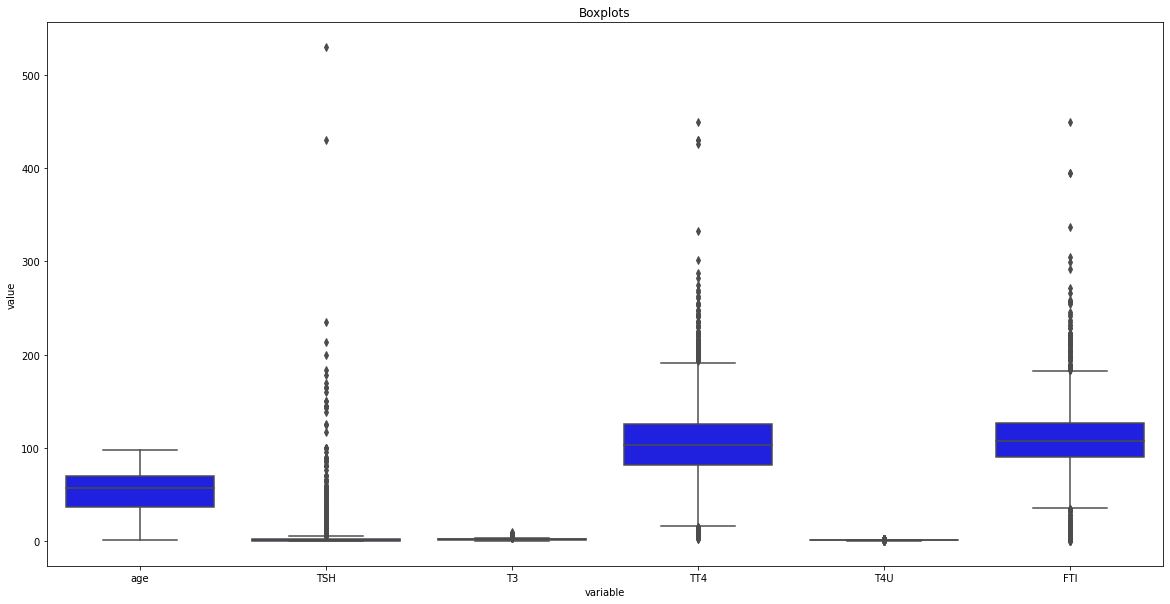

In [37]:
# using boxplots to check for outliers

boxplot = pd.DataFrame(data = Hypothyroid, columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI'])

plt.figure(figsize=(20,10))

sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')


plt.show()

- There are several outliers but since these could be valid observations, we shall retain them in the analysis.

Checking for Anomalies

In [38]:
# calculating the interquatile range

q1 = Hypothyroid['TSH'].quantile(0.25)
q3 = Hypothyroid['TSH'].quantile(0.75)
iqr1 = q3 - q1

# calculating the interquartile range using numpy

qr1 = np.quantile(Hypothyroid['TSH'], .25)
qr3 = np.quantile(Hypothyroid['TSH'], .75)
iqr2 = qr3 - qr1

# comparing  the two values

print(iqr2, iqr1)

2.3 2.3


# Exploratory Data Analysis

## Univariate Analysis

Investigating different variables individually

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


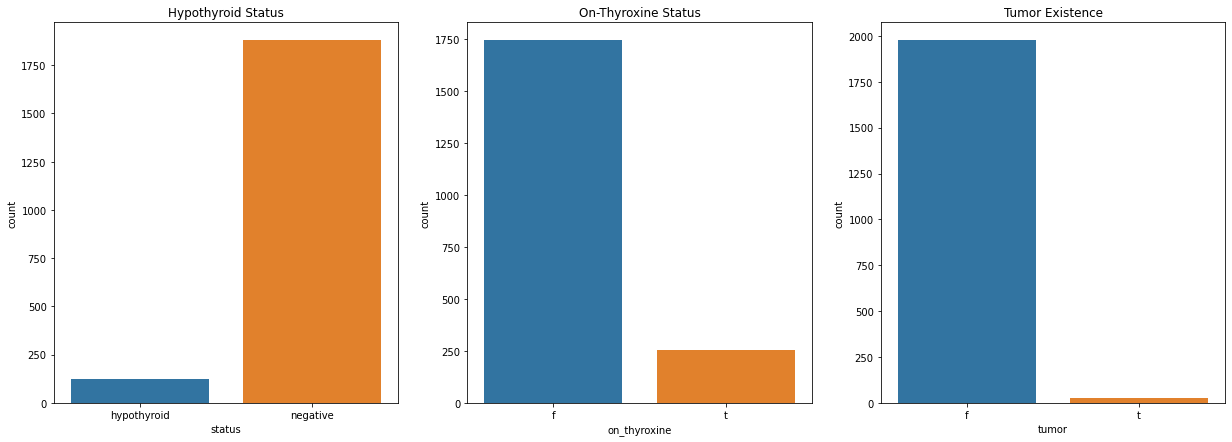

In [39]:
# plotting bar charts to check distributions

fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('status',data=Hypothyroid,ax=ax[0])
ax[0].set_title('Hypothyroid Status')
sns.countplot('on_thyroxine',data=Hypothyroid,ax=ax[1])
ax[1].set_title('On-Thyroxine Status')
sns.countplot('tumor',data=Hypothyroid,ax=ax[2])
ax[2].set_title('Tumor Existence')


plt.show()

In [41]:
# Frequency table for thyroid surgery

Hypothyroid.thyroid_surgery.value_counts()

f    1928
t      72
Name: thyroid_surgery, dtype: int64

In [42]:
# Frequency table for on_antithyroid_medication

Hypothyroid.on_antithyroid_medication.value_counts()

f    1973
t      27
Name: on_antithyroid_medication, dtype: int64

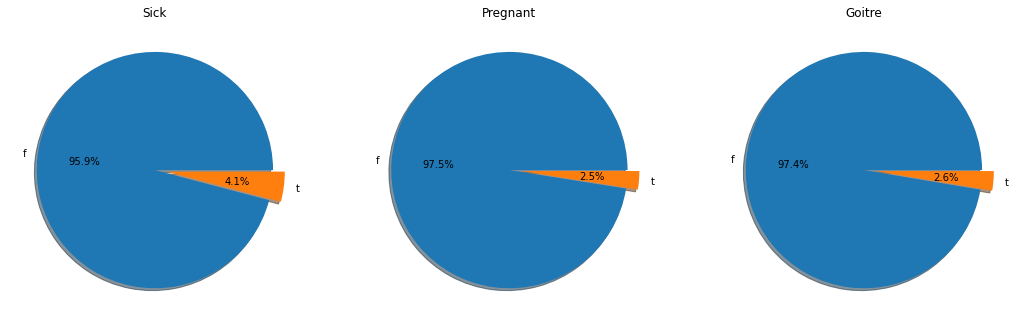

In [43]:
# Pie chart showing percentage distribution of sick, goitre and pregnant variables

fig,ax=plt.subplots(1,3,figsize=(18,6))
colors = ['firebrick', 'lightcoral', 'pink']
Hypothyroid['sick'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Sick')
ax[0].set_ylabel('')
Hypothyroid['pregnant'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Pregnant')
ax[1].set_ylabel('')
Hypothyroid['goitre'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[2].set_title('Goitre')
ax[2].set_ylabel('')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

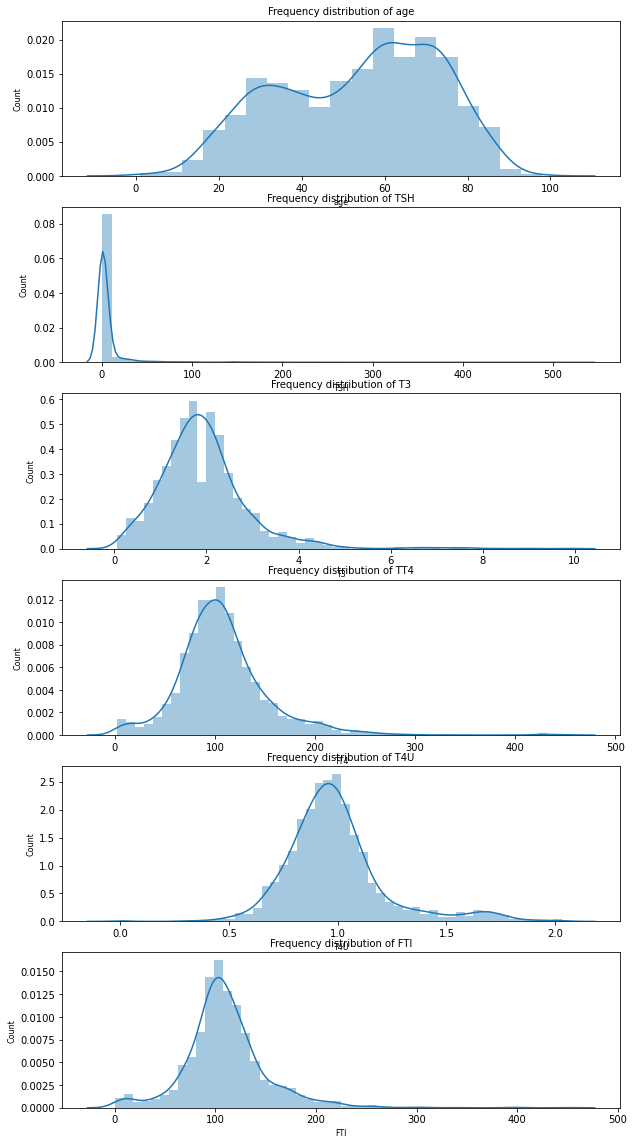

In [45]:
# Frequency distribution plots

col_names = ['age','TSH','T3', 'TT4', 'T4U', 'FTI']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(Hypothyroid[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

Measures of Central Tendency


In [46]:
# mean, mode and median of ages

print('Mean age is ' + str(Hypothyroid.age.mean()))
print('Median age is ' + str(Hypothyroid.age.median()))
print('Mode age is ' + str(Hypothyroid.age.mode()))

Mean age is 53.6225
Median age is 57.0
Mode age is 0    60
dtype: int64


In [47]:
# mean, mode and median of TSH variable

print('Mean TSH is ' + str(Hypothyroid.TSH.mean()))
print('Median TSH is ' + str(Hypothyroid.TSH.median()))
print('Mode TSH is ' + str(Hypothyroid.TSH.mode()))

Mean TSH is 6.092234999999993
Median TSH is 0.7
Mode TSH is 0    0.0
dtype: float64


- Checking the remaining means as well measures of dispersion in the summary below

In [48]:
# summary descriptive statistics  of numeric variables

Hypothyroid.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,53.622500,6.092235,1.924900,107.364650,0.988040,110.118150
std,19.302572,24.542970,0.970525,45.047061,0.231548,41.103306
min,1.000000,0.000000,0.050000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,1.300000,82.000000,0.850000,90.000000
50%,57.000000,0.700000,1.800000,103.000000,0.960000,107.000000
75%,70.000000,2.300000,2.300000,126.000000,1.070000,127.000000
max,98.000000,530.000000,9.800000,450.000000,2.030000,450.000000


## Bivariate Analysis

In this part of the analysis, we shall check for the coreelation between the target and features as well as amongst the independent variables

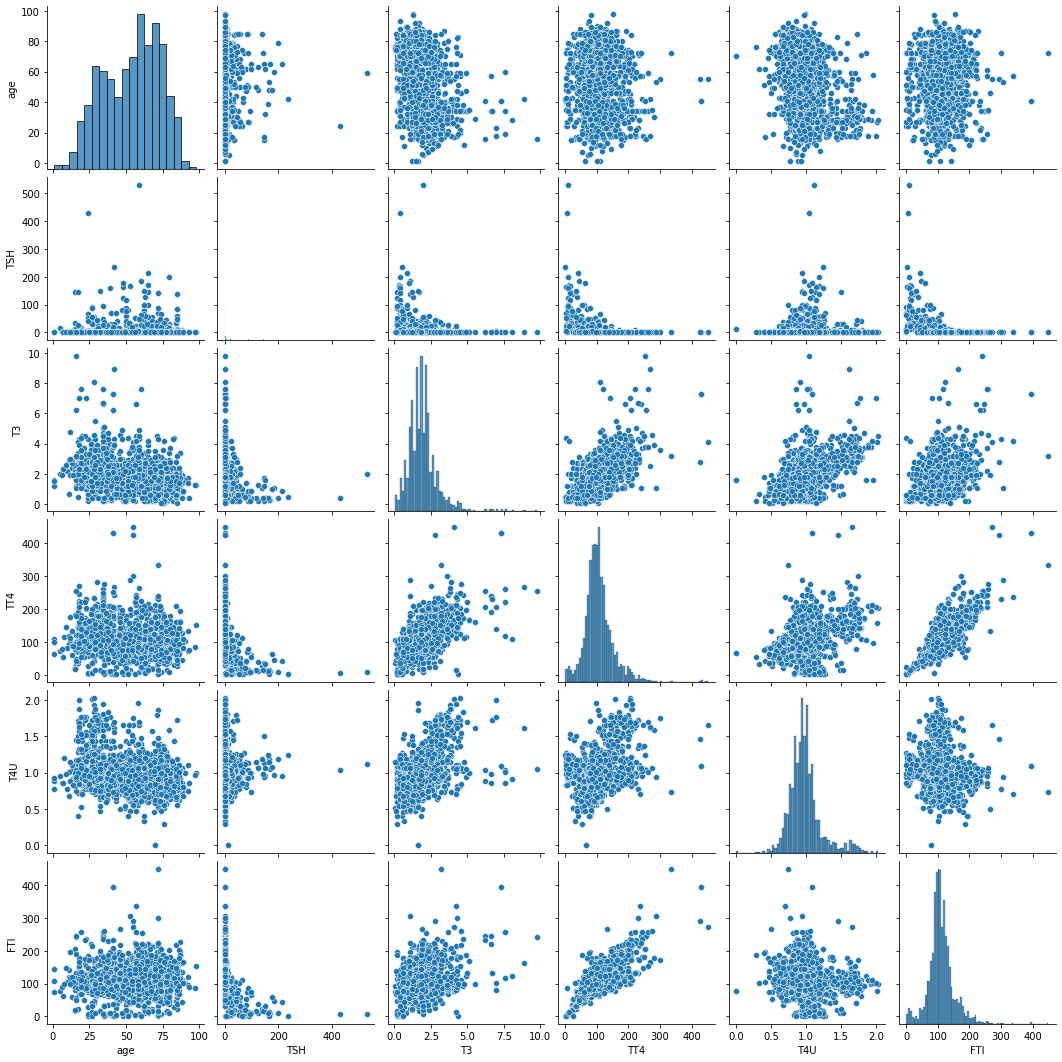

In [49]:
# Ploting the bivariate summaries and recording observations
#
sns.pairplot(Hypothyroid)
plt.show()

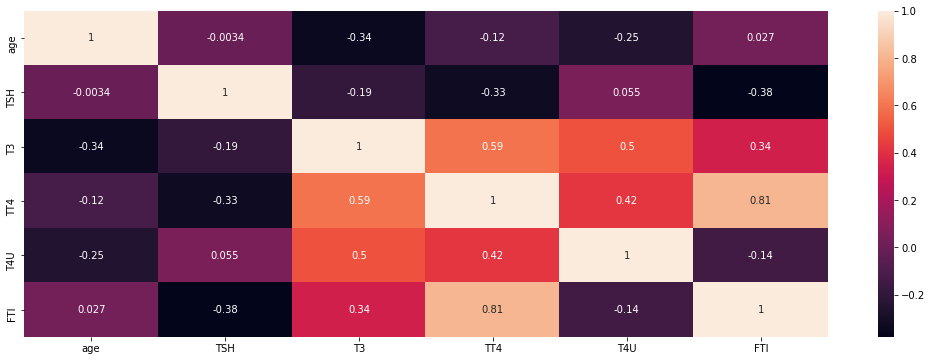

In [51]:
# Plotting the Pearson correlation coefficient among variables

plt.figure(figsize=(18, 6))
sns.heatmap(Hypothyroid.corr(),annot=True)
plt.show()

- There is a significant positive correlation between TT4 and T3, T4U and T3 as well as TT4 and FTI.

In [52]:
# creating age groups

conditions = [
    (Hypothyroid['age'] >= 1) & (Hypothyroid['age'] <= 10),
    (Hypothyroid['age'] >= 11) & (Hypothyroid['age'] <= 20),
    (Hypothyroid['age'] >= 21) & (Hypothyroid['age'] <= 30),
    (Hypothyroid['age'] >= 31) & (Hypothyroid['age'] <= 40),
    (Hypothyroid['age'] >= 41) & (Hypothyroid['age'] <= 50),
    (Hypothyroid['age'] >= 51) & (Hypothyroid['age'] <= 60),
    (Hypothyroid['age'] >= 61) & (Hypothyroid['age'] <= 100),
    ]

# create a list of the values we want to assign for each condition
values = ['Below 10', '11-20', '21-30', '31-40', '41-50', '51-60', 'Above 60']

# create a new column and use np.select to assign values to it using our lists as arguments
Hypothyroid['age_group'] = np.select(conditions, values)

# display updated DataFrame
Hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,age_group
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,Above 60
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,11-20
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,21-30
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,21-30
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,Above 60


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


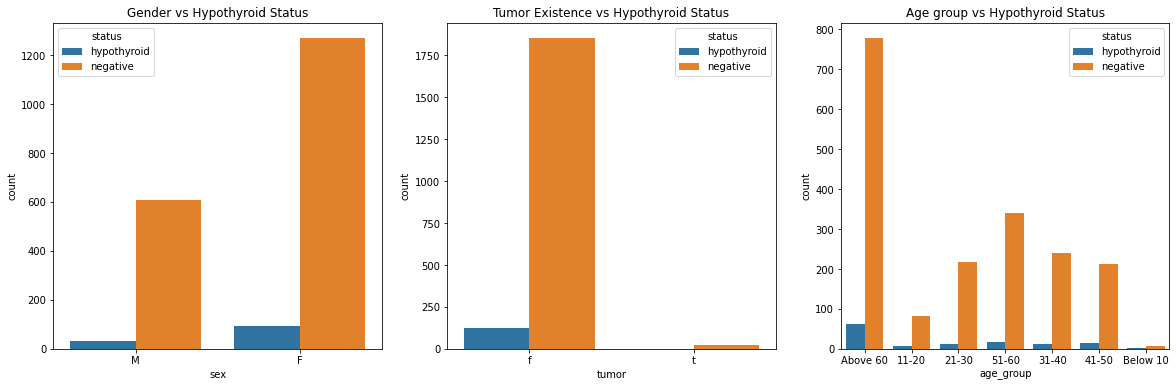

In [53]:
# comparing gender, tumor existence and age vs hypothyroid status

fig,ax=plt.subplots(1,3,figsize=(20,6))

sns.countplot('sex',hue='status',data=Hypothyroid,ax=ax[0])
ax[0].set_title('Gender vs Hypothyroid Status')

sns.countplot('tumor',hue='status',data=Hypothyroid,ax=ax[1])
ax[1].set_title('Tumor Existence vs Hypothyroid Status')

sns.countplot('age_group',hue='status',data=Hypothyroid,ax=ax[2])
ax[2].set_title('Age group vs Hypothyroid Status')


for ax in fig.axes:
    plt.sca(ax)
    


plt.show()

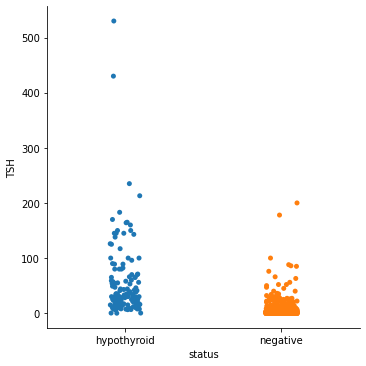

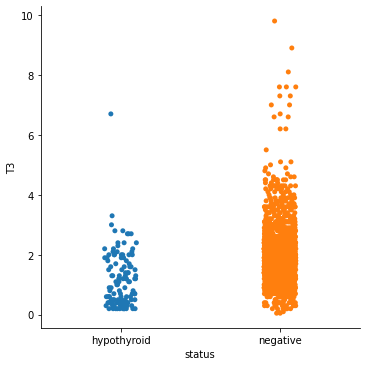

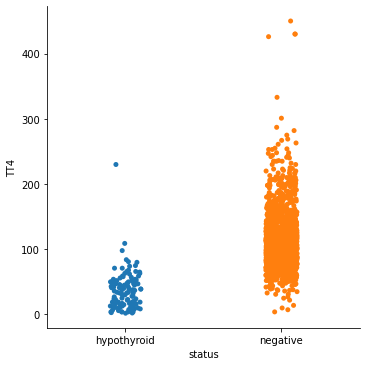

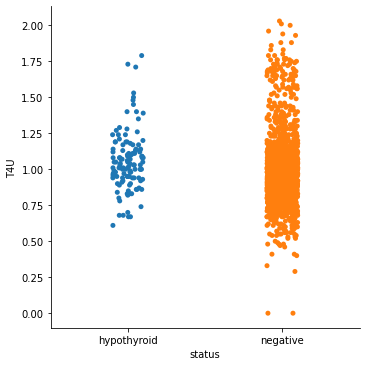

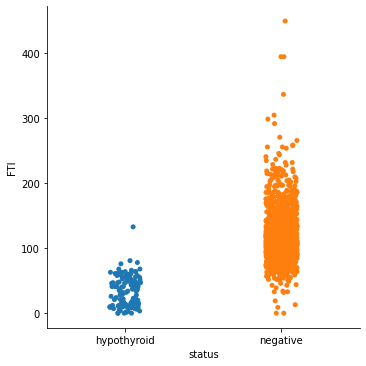

In [54]:
# comparing hypothyroid status to other numeric attributes

#sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="status", y="TSH", data=Hypothyroid)
sns.catplot(x="status", y="T3", data=Hypothyroid)
sns.catplot(x="status", y="TT4", data=Hypothyroid)
sns.catplot(x="status", y="T4U", data=Hypothyroid)
sns.catplot(x="status", y="FTI", data=Hypothyroid)

- From the graphs above, the higher the level of TSH, the higher the likelihood of hypothyroid. On the other hand, the lower the level of FTI the higher the likelihood of hypothyroid.

In [55]:
# plotting a crosstab to compare status , gender and pregnant attributes

pd.crosstab([Hypothyroid.sex,Hypothyroid.pregnant],Hypothyroid.status,margins=True).style.background_gradient(cmap='Pastel1_r')

In [56]:
# plotting a crosstab to compare status , lithium and goitre attributes

pd.crosstab([Hypothyroid.lithium,Hypothyroid.goitre],Hypothyroid.status,margins=True).style.background_gradient(cmap='Pastel1_r')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


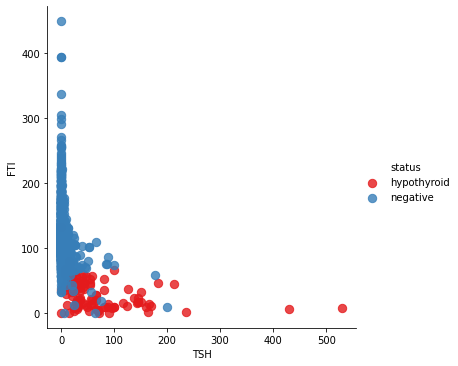

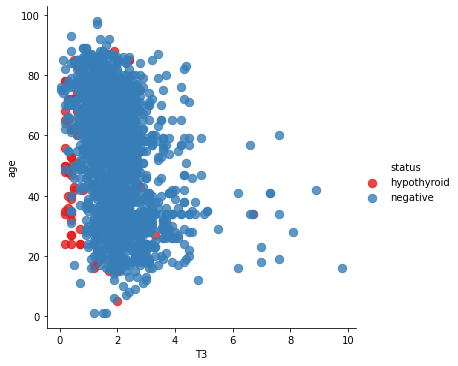

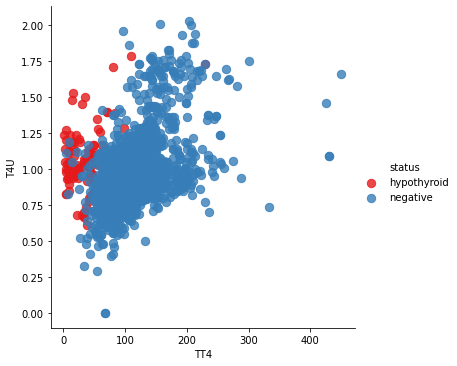

In [57]:
# Comparing numeric variables amongst each other
#
sns.lmplot('TSH', 'FTI', data=Hypothyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('T3', 'age', data=Hypothyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('TT4', 'T4U', data=Hypothyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

# Implementing the Solution

## Feature Engineering

In [58]:
# dropping unnecessary colums
#
Hypothyroid = Hypothyroid.drop(columns=['TSH_measured', 'T3_measured',
                                'TT4_measured', 'T4U_measured', 'FTI_measured', 'age_group'])

In [59]:
Hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [60]:
# encoding categorical variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()

Hypothyroid['sex'] = le.fit_transform(Hypothyroid['sex'])
Hypothyroid['on_thyroxine'] = le.fit_transform(Hypothyroid['on_thyroxine'])
Hypothyroid['query_on_thyroxine'] = le.fit_transform(Hypothyroid['query_on_thyroxine'])
Hypothyroid['goitre'] = le.fit_transform(Hypothyroid['goitre'])
Hypothyroid['on_antithyroid_medication'] = le.fit_transform(Hypothyroid['on_antithyroid_medication'])
Hypothyroid['thyroid_surgery'] = le.fit_transform(Hypothyroid['thyroid_surgery'])
Hypothyroid['query_hypothyroid'] = le.fit_transform(Hypothyroid['query_hypothyroid'])
Hypothyroid['query_hyperthyroid'] = le.fit_transform(Hypothyroid['query_hyperthyroid'])
Hypothyroid['pregnant'] = le.fit_transform(Hypothyroid['pregnant'])
Hypothyroid['sick'] = le.fit_transform(Hypothyroid['sick'])
Hypothyroid['tumor'] = le.fit_transform(Hypothyroid['tumor'])
Hypothyroid['lithium'] = le.fit_transform(Hypothyroid['lithium'])

Hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


In [61]:
# encoding the target variable

Hypothyroid['status'] = le.fit_transform(Hypothyroid['status'])

Hypothyroid.sample(n=10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
1631,1,73,1,0,0,0,0,0,0,0,0,0,0,0,0.84,1.3,66.0,1.17,56.0
2883,1,68,1,0,0,0,0,0,0,0,0,0,0,0,1.00,1.6,78.0,0.82,95.0
3066,1,74,0,1,0,0,0,0,0,0,0,0,0,0,21.00,1.8,126.0,1.18,107.0
1580,1,80,0,0,0,0,0,0,0,0,0,0,0,0,0.00,1.7,103.0,1.06,96.0
2078,1,20,0,0,0,0,0,0,1,0,0,0,0,0,1.20,1.5,63.0,0.71,89.0
938,1,60,0,0,0,0,0,1,0,0,0,0,0,0,0.10,2.6,206.0,1.12,184.0
700,1,70,1,0,0,0,0,0,0,0,0,0,0,0,0.00,1.2,94.0,0.93,101.0
1856,1,55,1,0,0,0,0,1,0,0,0,0,0,0,8.60,0.3,73.0,0.76,96.0
354,1,57,1,0,0,0,0,0,0,0,0,0,0,0,24.00,1.3,52.0,0.79,66.0
2149,1,73,0,1,0,0,1,0,0,0,0,0,0,0,0.00,2.5,156.0,0.95,120.0


- 0 indicates hypothyroid while 1 indicates no hypothyroidsm.

## Decision Trees

### Random Forest Classifier

In [62]:
# Defining the features and target variable

my_cols = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid',
       'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3', 'TT4',
       'T4U', 'FTI']
X = Hypothyroid[my_cols].values

y = Hypothyroid['status'].values


In [73]:
# Defining the training and tests sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
# Create a random forest classifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)

# Fitting the model
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred = forest.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())


     Actual  Predicted
203       1          1
251       1          1
393       1          1
198       1          1
71        1          1
           Actual   Predicted
count  400.000000  400.000000
mean     0.922500    0.927500
std      0.267718    0.259639
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [75]:
# Assessing model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


Mean Absolute Error: 0.02
Mean Squared Error: 0.02
Root Mean Squared Error: 0.1414213562373095
Accuracy: 0.98
[[ 26   5]
 [  3 366]]


- The above results show that Random Forest Classifier has a high accuracy level of 98%. The model has only a few misclassifications.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


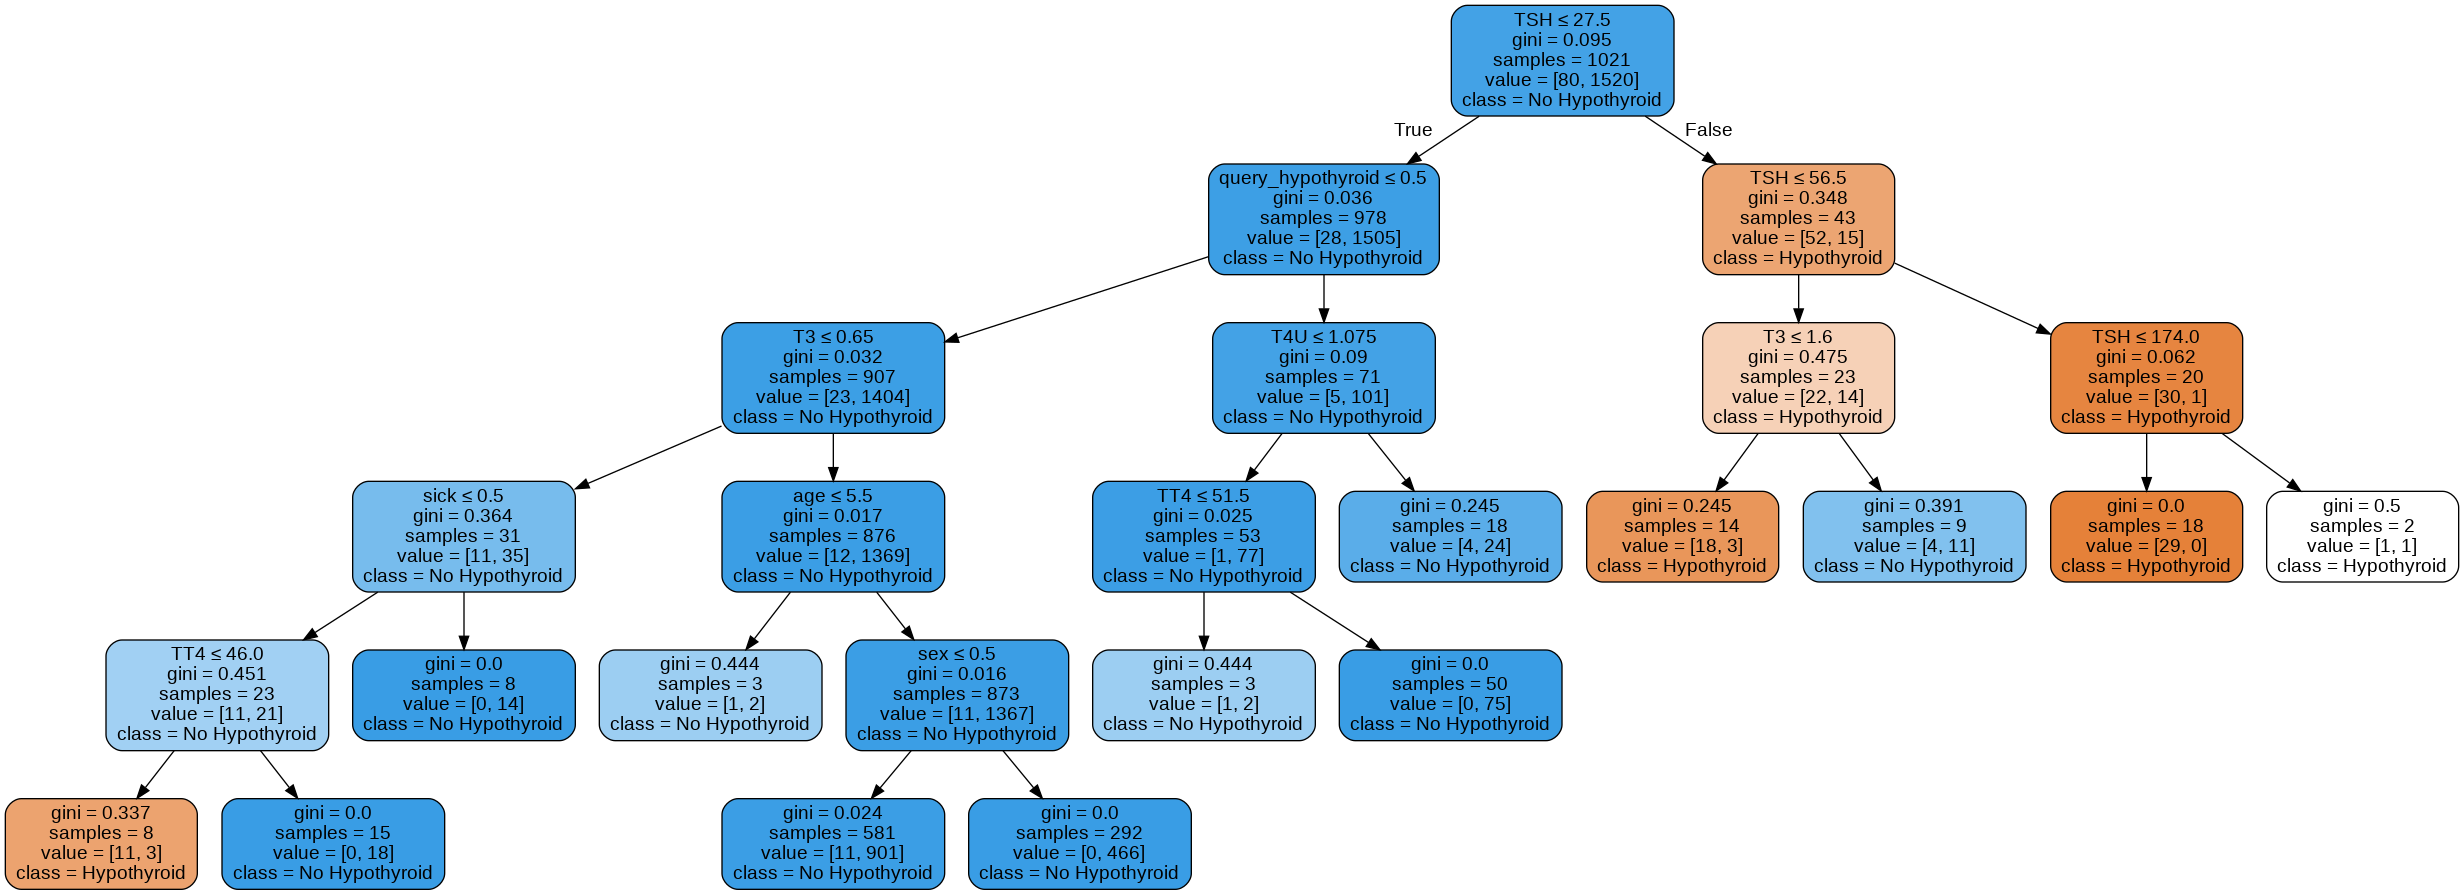

In [76]:
# Visualizing the model at random tree number 50

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picking the specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = my_cols, class_names=['Hypothyroid', 'No Hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidsm_forest.png')
Image(graph.create_png())

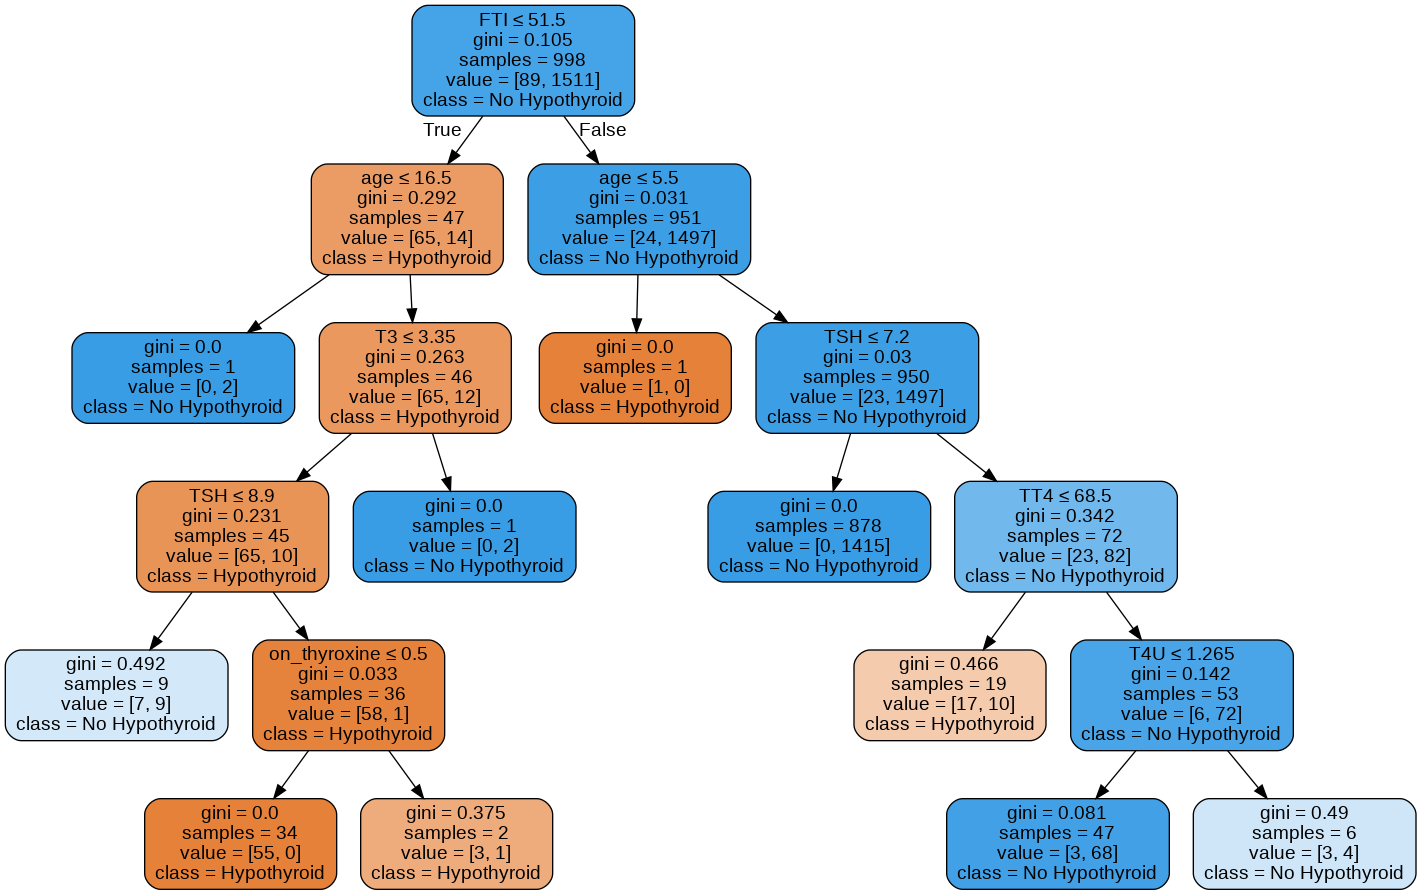

In [77]:
# at tree number 70

dot_data = StringIO()

tree = forest.estimators_[70]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = my_cols, class_names=['Hypothyroid', 'No Hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidsm_forest.png')
Image(graph.create_png())

In [78]:
# Checking the important features from the model

importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(my_cols, importances)]

# Sorting the values in descending order.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.12
Variable: TT4                  Importance: 0.09
Variable: age                  Importance: 0.03
Variable: T3                   Importance: 0.02
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0


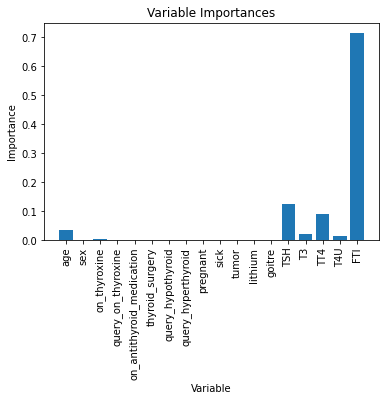

In [79]:
# visualizing feature importance

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, my_cols, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

- FTI, TSH, TT4, age, T3 and T4U are the only important variables when predicting whether or not a patient has a hypothyroid condition.

### Ada Boost Classifier

In [80]:
# create the ada boost classifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                          n_estimators=300, random_state=0)

# fit the model
ada_boost = ada_boost.fit(X_train, y_train)

# make prediction
y_pred_ada = ada_boost.predict(X_test)


In [ ]:
# check prediction data

comparison_frame_ada = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ada.flatten()})
print(comparison_frame_ada.sample(n=5))
print(comparison_frame_ada.describe())

     Actual  Predicted
143       1          1
266       1          1
271       1          1
182       1          1
209       1          1
           Actual   Predicted
count  400.000000  400.000000
mean     0.922500    0.920000
std      0.267718    0.271633
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [81]:
# Assessing ada boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Mean Absolute Error: 0.0125
Mean Squared Error: 0.0125
Root Mean Squared Error: 0.11180339887498948
Accuracy: 0.9875


Trying a different max depth level


In [82]:
# create new ada boost classifier with a different max depth

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=0)

# fit the model
ada_boost = ada_boost.fit(X_train, y_train)

# make prediction
y_pred_ada = ada_boost.predict(X_test)

# Assessing new ada boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Mean Absolute Error: 0.0075
Mean Squared Error: 0.0075
Root Mean Squared Error: 0.08660254037844387
Accuracy: 0.9925


- Comparing the ada boost classifier to the random forest classifier, the former has a reduced RMSE value and an improved accuracy score. In addition, a max depth of 4 improves the model performance even more compared to a max depth of 2.

In [83]:
# Get numerical feature importances
importances = list(ada_boost.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(my_cols, importances)]


# Sort the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TSH                  Importance: 0.19
Variable: age                  Importance: 0.16
Variable: FTI                  Importance: 0.16
Variable: T4U                  Importance: 0.15
Variable: T3                   Importance: 0.13
Variable: TT4                  Importance: 0.09
Variable: query_hypothyroid    Importance: 0.04
Variable: sex                  Importance: 0.02
Variable: on_thyroxine         Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: query_hyperthyroid   Importance: 0.01
Variable: sick                 Importance: 0.01
Variable: query_on_thyroxine   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0


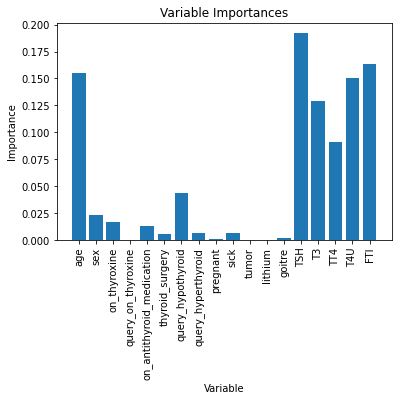

In [84]:
# visualizing feature importance

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, my_cols, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

- Ada boost smaller weights on more variables.

### Gradient Boosting Classifier

In [85]:
# specifying the number of trees
target_number_of_trees = 200

# create the gradient boosting classifier
gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)

# train the model
gbr = gbr.fit(X_train, y_train)

# make prediction
y_pred_gbr = gbr.predict(X_test)


In [86]:
# Assessing gradient boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

Mean Absolute Error: 0.01
Mean Squared Error: 0.01
Root Mean Squared Error: 0.1
Accuracy: 0.99


- Although the above gradient boost model performs really well, the high accuracy score (almost 1 when rounded off) could point towards overffiting. We can adjust the hyperparameters i.e. learning rate, max depth and number of trees to improve the model further.

In [87]:
# adjusting the hyperparameters (no. of trees = 50, learning rate = 0.5, max_depth = 4)

target_number_of_trees = 50
gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.5, max_depth=4)
gbr = gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Assessing new gradient boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

Mean Absolute Error: 0.0175
Mean Squared Error: 0.0175
Root Mean Squared Error: 0.13228756555322954
Accuracy: 0.9825


In [88]:
# adjusting the hyperparameters (no. of trees = 100, learning rate = 0.3, max_depth = 4)

target_number_of_trees = 100
gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.3, max_depth=4)
gbr = gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Assessing new gradient boost model accuracy

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

Mean Absolute Error: 0.0125
Mean Squared Error: 0.0125
Root Mean Squared Error: 0.11180339887498948
Accuracy: 0.9875


- The optimal hyperparameters given an accuracy score of 98.75% are: no. of trees = 100, learning rate = 0.3 and  max_depth = 4

In [89]:
# Get numerical feature importances
importances = list(gbr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(my_cols, importances)]

#  sort the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.61
Variable: TSH                  Importance: 0.23
Variable: age                  Importance: 0.03
Variable: on_thyroxine         Importance: 0.03
Variable: on_antithyroid_medication Importance: 0.03
Variable: query_hypothyroid    Importance: 0.02
Variable: T3                   Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: T4U                  Importance: 0.0


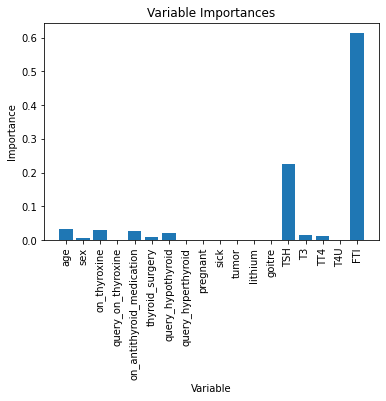

In [90]:
# visualizing feature importance

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, my_cols, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [91]:
# comparing accuracy scores of all three models

print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Ada Boost Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))
print("Gradient Boost Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr))

Random Forest Classifier Accuracy: 0.98
Ada Boost Classifier Accuracy: 0.9925
Gradient Boost Classifier Accuracy: 0.9875


- From the results above, we see that Ada Boost and Gradient Boost classifiers perform better than Random Forest Classifier. 

- Although Ada Boost and Gradient Boost classifiers perform similarly, the former gives small weights to a large number of variables while the latter puts a lot more weight on a few variables. Since Ada Boost is generally more vulnerable to overfitting, I would recommend choosing Gradient Boosting Classifier for this particular research problem. 

- The hyperparameters of the Gradient Boost Classifier can be adjusted further to optimize the performance of the model.

## Support Vector Machines (SVM)

- For this first part, I will start modelling with the two most important features suggested by Gradient Boosting Classifier, which was the optimal DecisionTree Classifier. These two features are FTI and TSH. I will apply polynomial, linear and rbf kernel functions to build the SVM model then pick the kernel that performs best.

- Finally, I will optimize the best performing kernel by tuning the hyperparameters and using additional features.

### Linear SVM

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


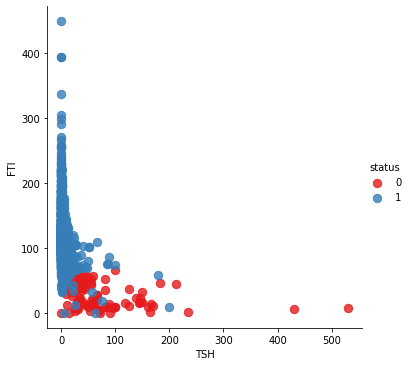

In [93]:
# Plotting FTI and TSH based on hypothyroid status

sns.lmplot('TSH', 'FTI', data=Hypothyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

- From the graph above, we can see that FTI level is a pretty good indicator of hypothyroid condition. A lower level of FTI is a likely indication of hypothyroidsm.

- The higher the level of TSH in a patient, the more likely they are to have a hypothyroid condition.

In [95]:
# Redefining the features and target variable

X = Hypothyroid[['TSH', 'FTI']].values

y = Hypothyroid['status'].values

# Defining the training and tests sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model

model = SVC(kernel= 'linear')
model.fit(X_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
# Predict the response for the test set

y_pred_linSVM = model.predict(X_test)
comparison_frame_linSVM = pd.DataFrame({'Actual':y_test, 'Predicted_linSVC':y_pred_linSVM})
comparison_frame_linSVM




,Actual,Predicted_linSVC
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
395,1,1
396,1,1
397,1,1
398,1,1


In [97]:
# Checking the accurancy of the model

model_accuracy = accuracy_score(y_test,y_pred_linSVM)
print('Accuracy score: ', model_accuracy)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linSVM))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linSVM))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linSVM)))
print('R2_score:' ,r2_score(y_test, y_pred_linSVM))


Accuracy score:  0.985
Mean Absolute Error: 0.015
Mean Squared Error: 0.015
Root Mean Squared Error: 0.1224744871391589
R2_score: 0.7901914503015998


- We have gotten a classification rate of 98.5%. This is a pretty good accuracy score although slightly lower than the Gradient Boost Classifier.


### Polynomial SVM

In [99]:
# Building the model 

polyclassifier = SVC(kernel='poly',degree=3,gamma=2**-5)

# Training the model using the training set

polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)

# Model Evaluation

print('Accuracy: ', accuracy_score(y_test, y_pred_poly))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))



Accuracy:  0.97
Mean Absolute Error: 0.03
Mean Squared Error: 0.03
Root Mean Squared Error: 0.17320508075688773


In [102]:
# Polynomial classifier with a different gamma value

polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred_poly = polyclassifier.predict(X_test)

# Model Evaluation
print('Accuracy: ', accuracy_score(y_test, y_pred_poly))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('R2_score:' ,r2_score(y_test, y_pred_poly))

Accuracy:  0.985
Mean Absolute Error: 0.015
Mean Squared Error: 0.015
Root Mean Squared Error: 0.1224744871391589
R2_score: 0.7901914503015998


- The polynomial SVM does not improve the model performance much further compared to the linear SVM.

### Radial basis function (rbf)

In [103]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)

# Model Evaluation
print('Accuracy: ', accuracy_score(y_test, y_pred_rbf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))
print('R2_score:' ,r2_score(y_test, y_pred_rbf))

Accuracy:  0.985
Mean Absolute Error: 0.015
Mean Squared Error: 0.015
Root Mean Squared Error: 0.1224744871391589
R2_score: 0.7901914503015998


- There is no much improvement in the model's performance when comparing linear, polynomial and rbf kernels. For this analysis, we can choose the rbf model to perform hyperparameter tuning to further optimize the classification.

Hyperparameter tuning on rbf kernel

- We need to adjust the C and gamma values for optimal performance.

In [105]:
# define C and gamma range

C_range=list(range(1,10))
gamma_range = [0.0001, 0.001, 0.01, 1, 10]

# fit the C and gamma range on parameter grid
parameter_grid = dict(gamma=gamma_range, C=C_range)

#  find the best parameters and best model score
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=parameter_grid, cv=5, n_jobs=-1, scoring='accuracy')

# fit the grid model
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [0.0001, 0.001, 0.01, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [106]:
# find optimal parameters

best_parameters = grid.best_params_

print(best_parameters)


{'C': 5, 'gamma': 0.001}


- The optimal C value is 5 while the optimal gamma value is 0.001

In [107]:
# fit model with above parameters

rbfclassifier = SVC(kernel='rbf', C = 5, gamma = 0.001)

rbfclassifier.fit(X_train, y_train)

y_pred_rbf2 = rbfclassifier.predict(X_test)

# Model Evaluation

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf2)))
print('R2_score:' ,r2_score(y_test, y_pred_rbf2))
print('Accuracy Score :', accuracy_score(y_test,y_pred_rbf2))

Mean Absolute Error: 0.0125
Mean Squared Error: 0.0125
Root Mean Squared Error: 0.11180339887498948
R2_score: 0.8251595419179998
Accuracy Score : 0.9875


- Out of all SVM models, this optimized rbf model performs best with an improved R2 and Accuracy score as well as reduced RMSE value.

Updating the optimized rbf model with the remaining features

In [109]:
# Redefining the features and target variable

X = Hypothyroid.drop('status', 1)
y = Hypothyroid['status']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )


In [110]:
# Defining the optimised rbf model

rbfclassifier = SVC(kernel='rbf', gamma=0.001, C=5)

# Fitting the model
rbfclassifier.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
# making prediction
y_pred_final = rbfclassifier.predict(X_test)

# Model Evaluation
print('Optimized rbf Accuracy: ', accuracy_score(y_test, y_pred_final))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_final))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_final))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_final)))
print('Optimized rbf R2_score:' ,r2_score(y_test, y_pred_final))

Optimized rbf Accuracy:  0.985
Mean Absolute Error: 0.015
Mean Squared Error: 0.015
Root Mean Squared Error: 0.1224744871391589
Optimized rbf R2_score: 0.7232153154192134


- The optimized rbf model with all features performs poorer when compared to the optimized rbf model with only two features.
- Overall, when using all features available in the dataset, gradient boosted classifier had a slightly better performance (accuracy score = 0.9875) compared to rbf SVM (accuracy score = 0.985) 

# Challenging the Solution

Below is a summary of the accuracy scores for each model:

- Random Forest Classifier - 0.98
- Ada Boost Classifier - 0.9925
- Gradient Boost Classifier - 0.9875

- Linear SVM - 0.985
- Polynomial SVM - 0.985
- Optimized Radial Basis Function SVM - 0.9875
- Optimized Rbf SVM (with all features) - 0.985

Overall, Ada Boost Classifier had the highest performance, although it demonstrates a likelihood of overfitting. The optimized RBF model with only two features performs well, but the model's accuracy score decreases when more features are added.

In this case, I would recommend that the Gradient Boost Classifier be used as the best classification model since it has a high performance and incorporates all relevant features available in the dataset.

One aspect that can be improved in this analysis is further research or engagement with a subject matter expert to inform the relevance of features on a practical level.

# Follow-up Questions

## a) Did we have the right question?


Yes, the research question was clear and specific enough.

## b) Did we have the right data?

Yes, although the feature description was not available. It is important to know exactly what an attribute represents in order to determine it's relevance to the research question.

## c) Do we need other data to answer the research question?

Not necessarily other data, but more information about the current data.
